In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [51]:
data = pd.read_csv('HeartDiseaseTrain-Test.csv')
pd.set_option('display.max_columns', None)
data.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
5,58,Female,Typical angina,100,248,Lower than 120 mg/ml,Normal,122,No,1.0,Flat,Zero,Fixed Defect,1
6,58,Male,Typical angina,114,318,Lower than 120 mg/ml,Left ventricular hypertrophy,140,No,4.4,Upsloping,Three,Normal,0
7,55,Male,Typical angina,160,289,Lower than 120 mg/ml,Normal,145,Yes,0.8,Flat,One,Reversable Defect,0
8,46,Male,Typical angina,120,249,Lower than 120 mg/ml,Normal,144,No,0.8,Downsloping,Zero,Reversable Defect,0
9,54,Male,Typical angina,122,286,Lower than 120 mg/ml,Normal,116,Yes,3.2,Flat,Two,Fixed Defect,0


## Cleaning Dataset

In [52]:
print(data.isnull().sum())

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

In [54]:
data = data.rename(columns={'cholestoral': 'cholesterol'})

## Clustering Data

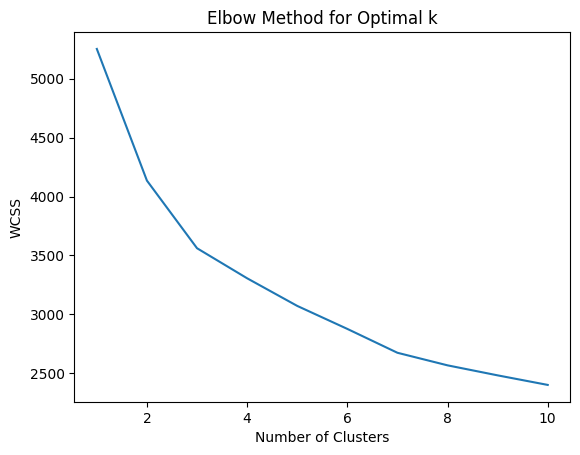

In [55]:
features = ['age', 'sex', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'Max_heart_rate', 'exercise_induced_angina']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'resting_blood_pressure', 'cholesterol', 'Max_heart_rate']),
        ('cat', OneHotEncoder(), ['sex', 'fasting_blood_sugar', 'exercise_induced_angina'])])
X_transformed = preprocessor.fit_transform(data[features])
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

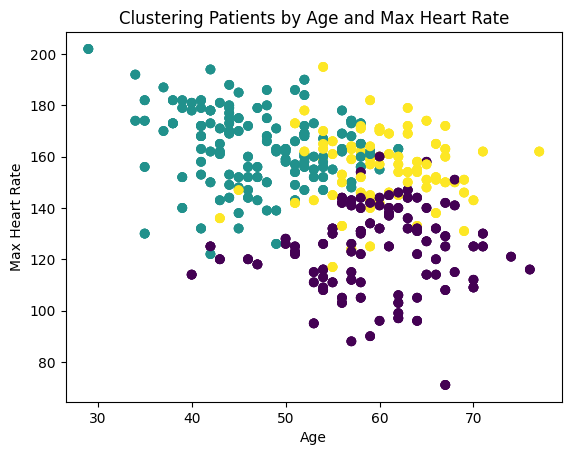

In [56]:
k_optimal = 3  
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_transformed)
plt.scatter(data['age'], data['Max_heart_rate'], c=data['Cluster'], cmap='viridis')
plt.title('Clustering Patients by Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

In [60]:
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])  # Male = 1, Female = 0
data['fasting_blood_sugar'] = label_encoder.fit_transform(data['fasting_blood_sugar'])
data['exercise_induced_angina'] = label_encoder.fit_transform(data['exercise_induced_angina'])  # Yes = 1, No = 0

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data[features])

k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = kmeans.fit_predict(df_scaled)

# Calculate the mean of each feature for each cluster
cluster_summary = data.groupby('Cluster')[features].mean()

# Display the cluster summary table
cluster_summary

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,Max_heart_rate,exercise_induced_angina
Cluster,,,,,,,
0,56.377622,0.923077,129.220280,244.559441,0.867133,130.199301,0.958042
1,48.100478,0.820574,125.069378,228.337321,0.935407,163.442584,0.052632
2,60.950156,0.330218,142.261682,270.283489,0.725857,147.308411,0.152648
